# The Sparks Foundation Task #3

# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import plotly.express as px

# Data Export

In [2]:
df=pd.read_csv(r'SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [4]:

df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:

df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df=df.drop(['Postal Code'],axis=1)

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Exploring Data 

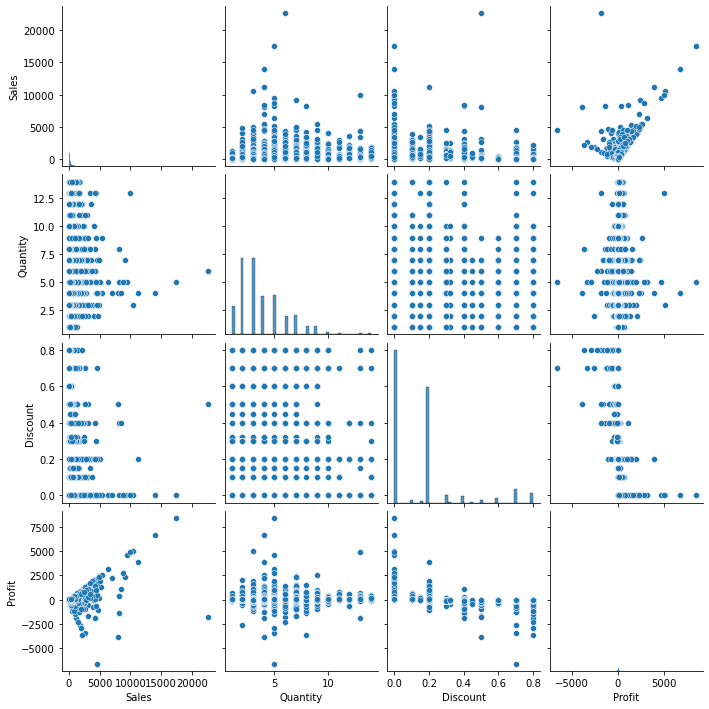

In [9]:
sns.pairplot(df)
plt.show()

In [10]:

df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


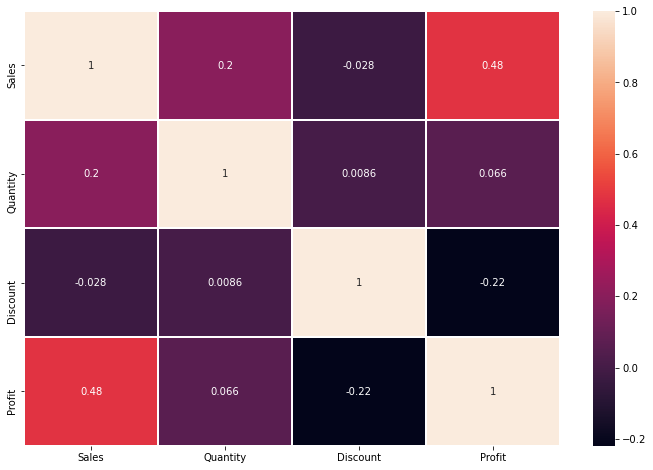

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),linewidth=1,annot=True)
plt.show()

# Visualising the data

In [12]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [13]:
import plotly.io as pio

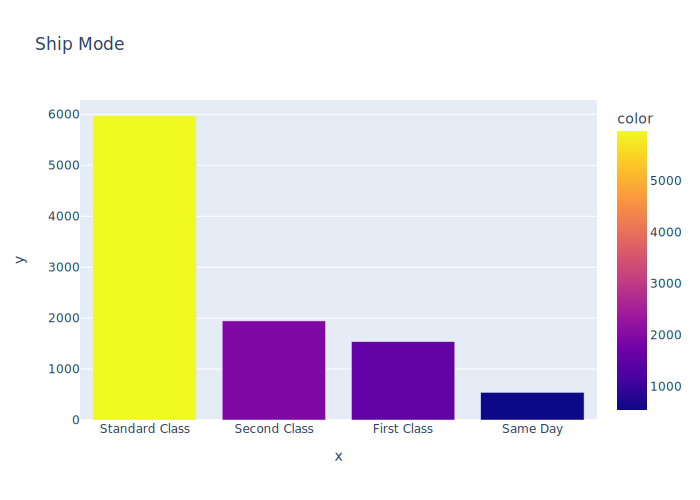

In [48]:
pio.renderers.default = "svg"
fig=px.bar(x=df['Ship Mode'].value_counts().index,
      y=df['Ship Mode'].value_counts(),
       title='Ship Mode',color=df['Ship Mode'].value_counts())
fig.update_layout()
fig.show("svg")

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



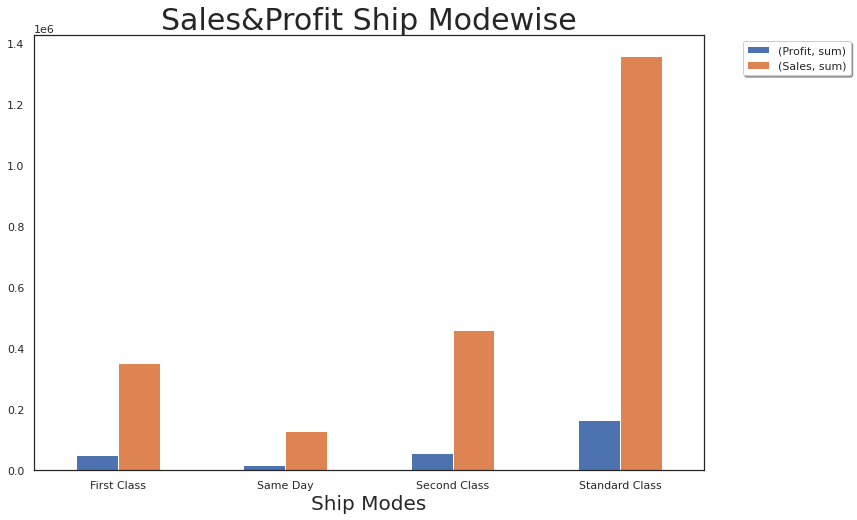

In [15]:
sns.set(style='white')
df.groupby('Ship Mode')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow = True)
plt.xlabel('Ship Modes',fontsize=20)
plt.xticks(rotation=360)
plt.title('Sales&Profit Ship Modewise',fontsize=30)
plt.show()

# Visualising the segment

In [16]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

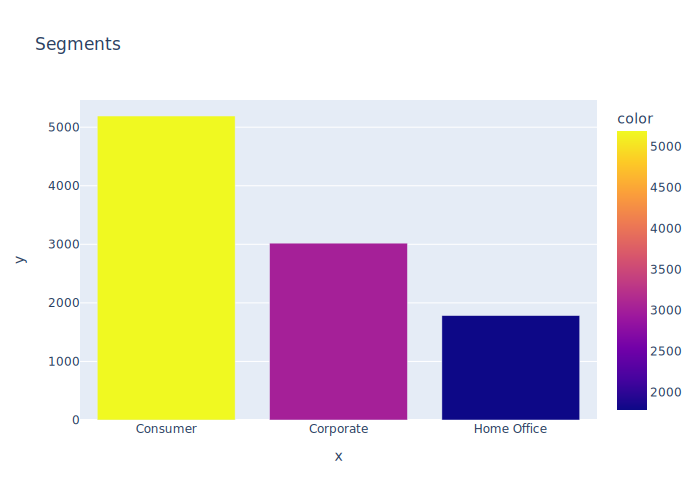

In [47]:
pio.renderers.default = "svg"
fig=px.bar(df,x=df['Segment'].value_counts().index,
      y=df['Segment'].value_counts(),
       title='Segments',color=df['Segment'].value_counts()
      )
fig.update_layout()
fig.show("svg")

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



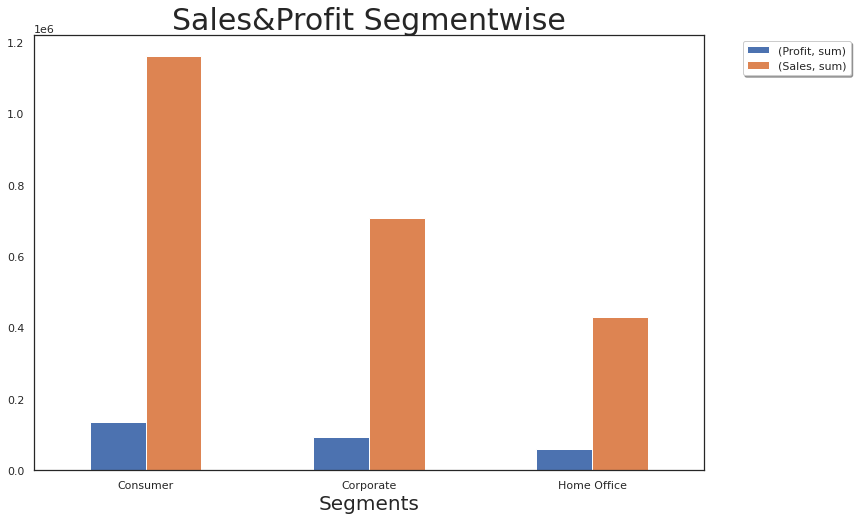

In [18]:
sns.set(style='white')
df.groupby('Segment')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow = True)
plt.xlabel('Segments',fontsize=20)
plt.xticks(rotation=360)
plt.title('Sales&Profit Segmentwise',fontsize=30)
plt.show()

In [19]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

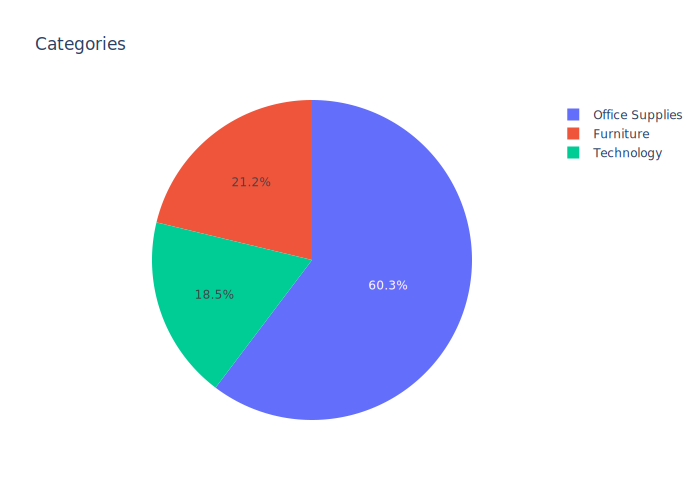

In [42]:
pio.renderers.default = "svg"
fig=px.pie(df,values=df['Category'].value_counts(),names=df['Category'].value_counts().index,title='Categories')
fig.show("svg")


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<Figure size 2880x2160 with 0 Axes>

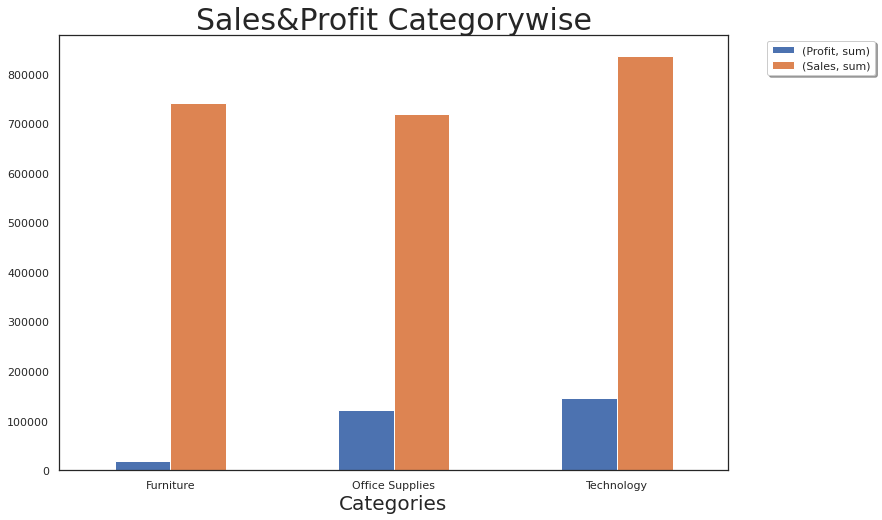

In [50]:
sns.set(style='white')
plt.figure(figsize=(40,30))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(12,8))
plt.xlabel('Categories',fontsize=20)
plt.title('Sales&Profit Categorywise',fontsize=30)
plt.xticks(rotation=360)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow = True)
plt.show()

# Visualising the sub-category

In [22]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

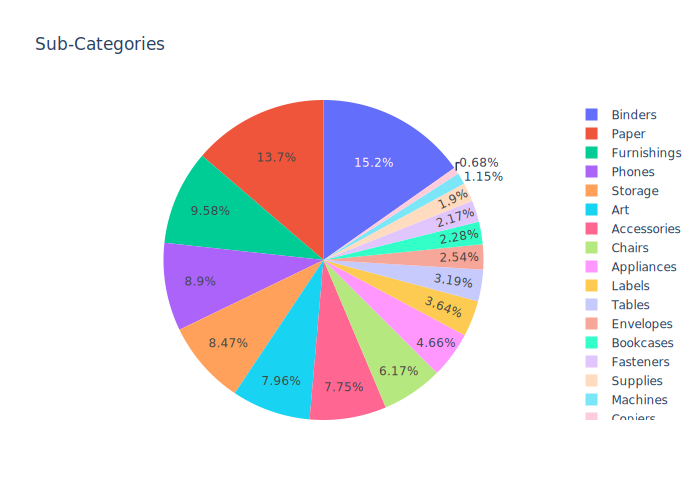

In [43]:
pio.renderers.default = "svg"
fig=px.pie(df,values=df['Sub-Category'].value_counts(),names=df['Sub-Category'].value_counts().index,title='Sub-Categories')
fig.show("svg")

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



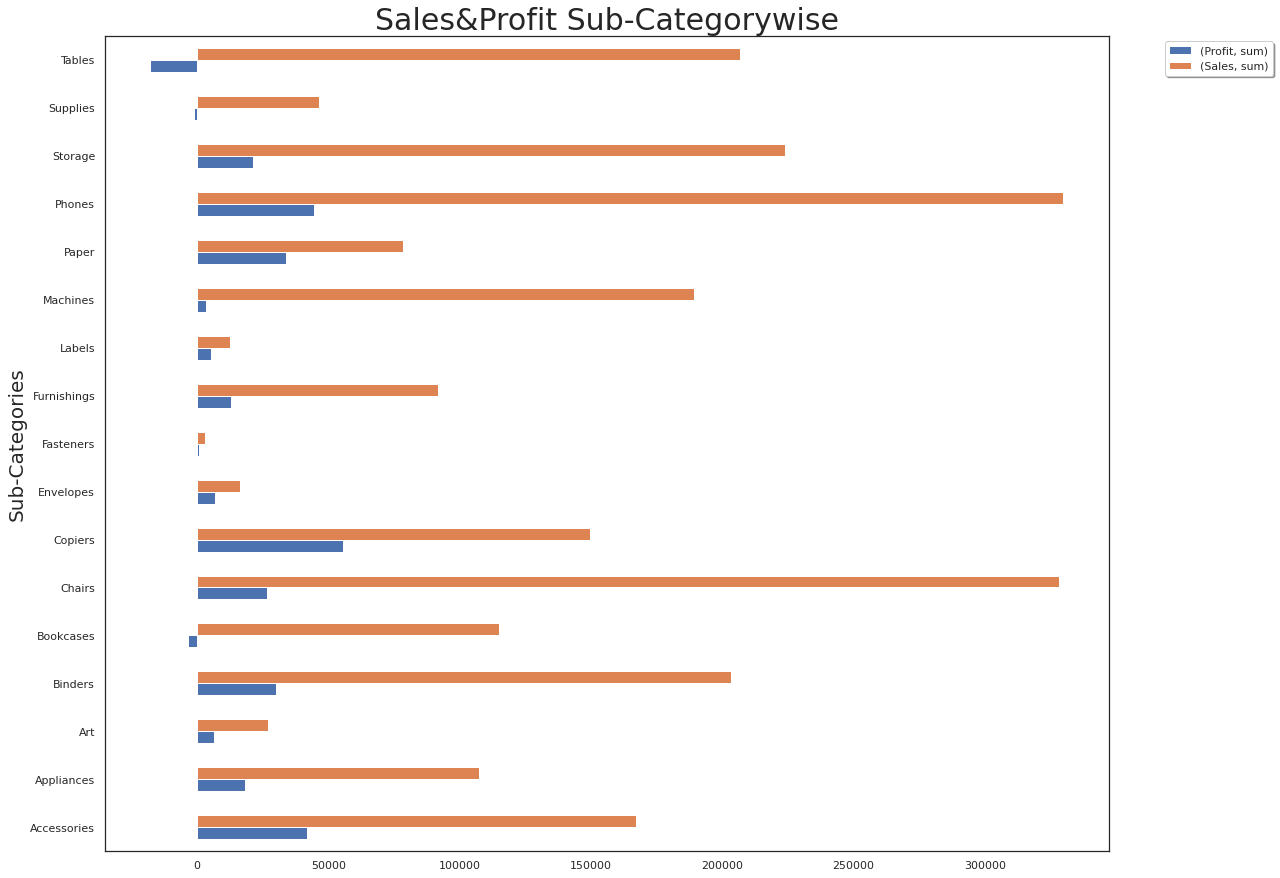

In [24]:
sns.set(style='white')
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.barh(figsize=(18,15))
plt.ylabel('Sub-Categories',fontsize=20)
plt.title('Sales&Profit Sub-Categorywise',fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow = True)
plt.show()

In [25]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

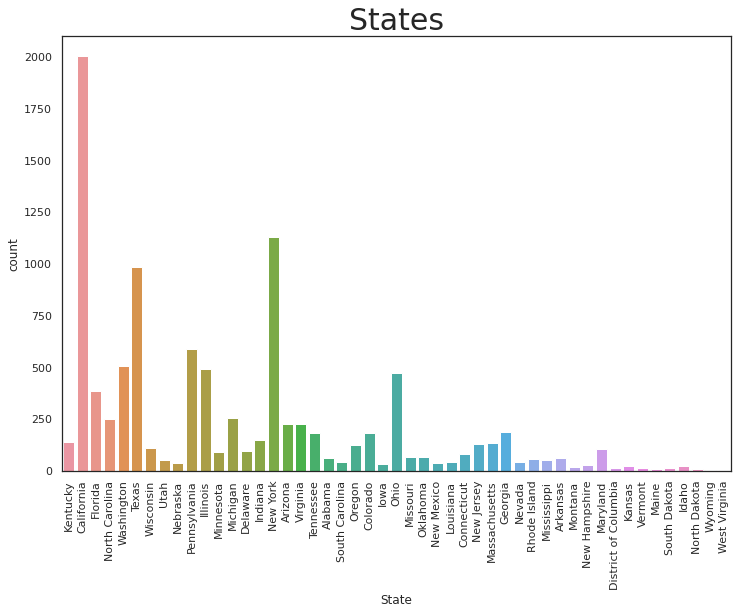

In [26]:
sns.set(style='white')
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='State')
plt.xticks(rotation=90)
plt.title('States',fontsize=30)
plt.show()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



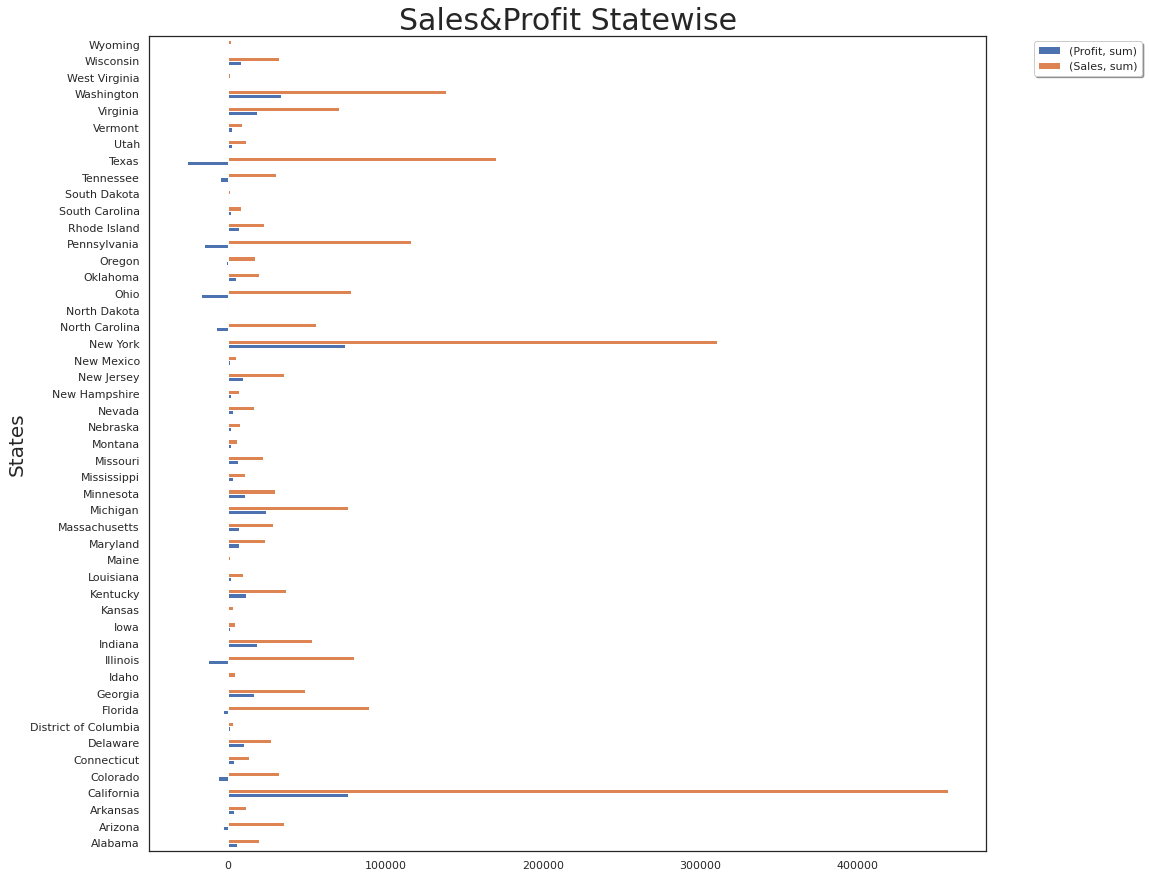

In [27]:
sns.set(style='white')
df.groupby('State')['Profit','Sales'].agg(['sum']).plot.barh(figsize=(15,15))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow = True)
plt.ylabel('States',fontsize=20)
plt.title('Sales&Profit Statewise',fontsize=30)
plt.show()

In [28]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

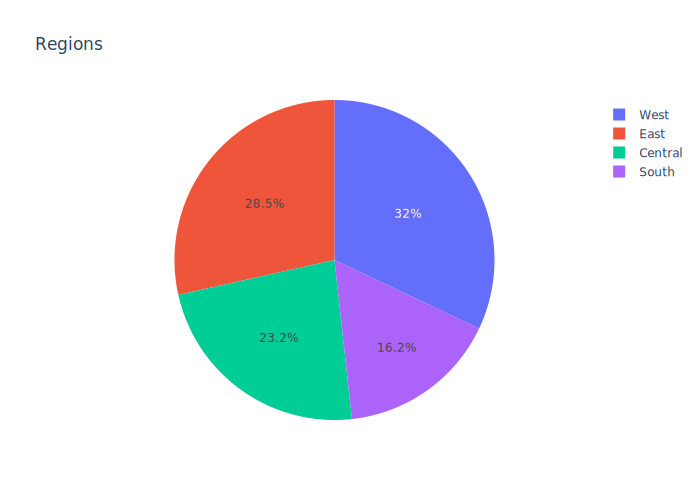

In [44]:
pio.renderers.default = "svg"
fig=px.pie(df,values=df['Region'].value_counts(),names=df['Region'].value_counts().index,title='Regions')
fig.show("svg")

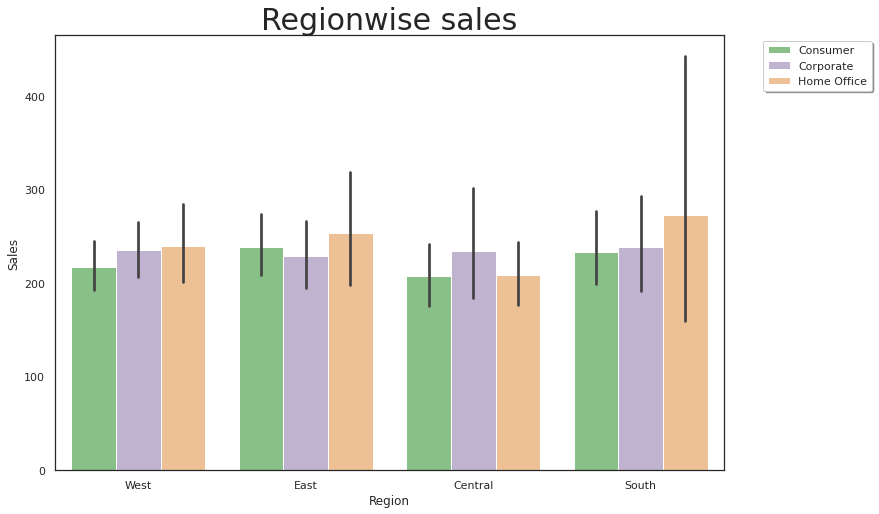

In [30]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='Accent')
plt.title('Regionwise sales',fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, shadow = True)
plt.show()

In [31]:
d=df.groupby('Region')[['Profit','Sales']].sum()
d=d.sort_values(['Sales'], ascending=[False])
d

,Profit,Sales
Region,,
West,108418.4489,725457.8245
East,91522.7800,678781.2400
Central,39706.3625,501239.8908
South,46749.4303,391721.9050


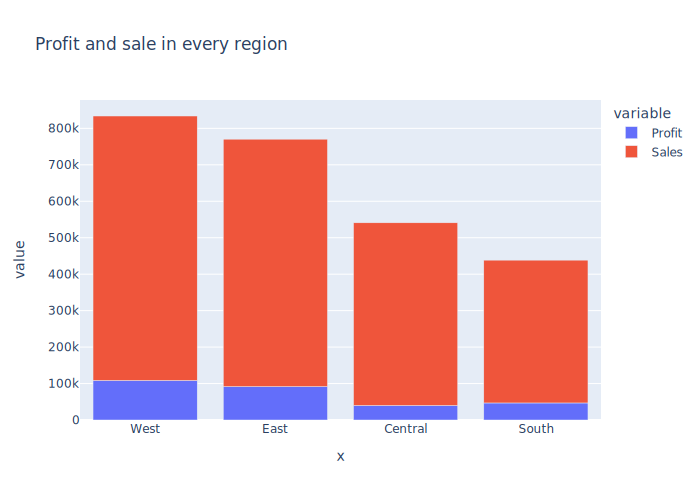

In [32]:
px.bar(d,x=df['Region'].value_counts().index,y=['Profit','Sales'],title='Profit and sale in every region')

In [33]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

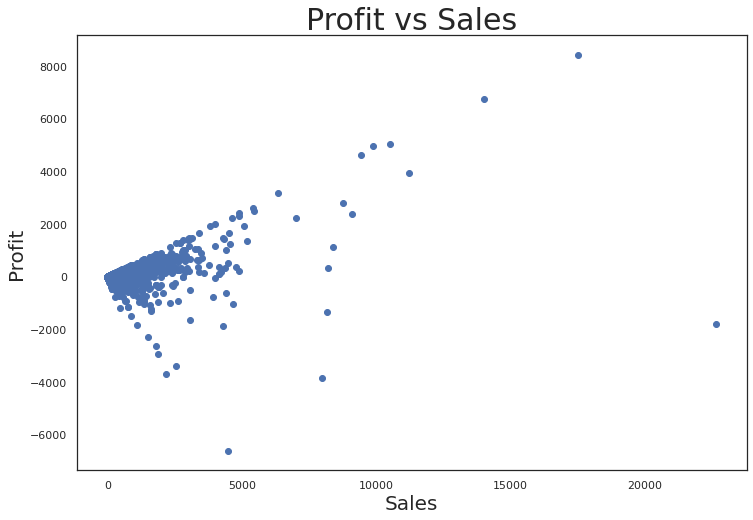

In [34]:
sns.set(style='white')
plt.figure(figsize=(12,8))
plt.scatter(x=df['Sales'],y=df['Profit']
           )
plt.xlabel('Sales',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.title('Profit vs Sales',fontsize=30)
plt.show()

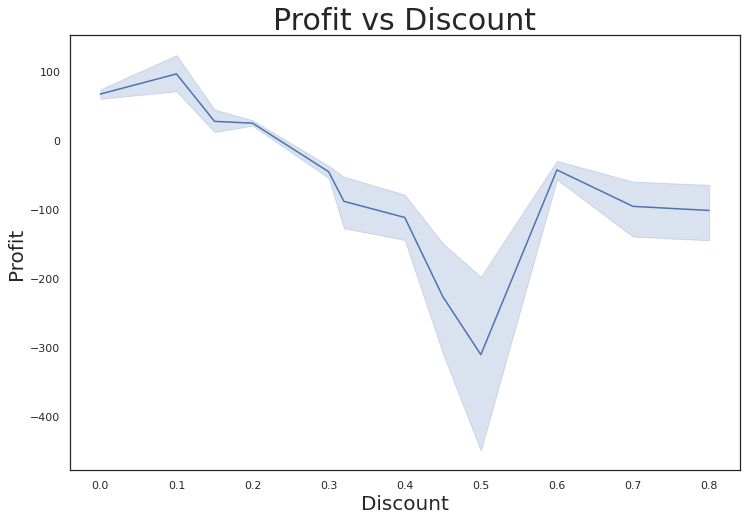

In [35]:
plt.figure(figsize=(12,8))
sns.set(style='white')
sns.lineplot(x='Discount',y='Profit',data=df)
plt.title('Profit vs Discount',fontsize=30)
plt.xlabel('Discount',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.show()

<Figure size 864x576 with 0 Axes>

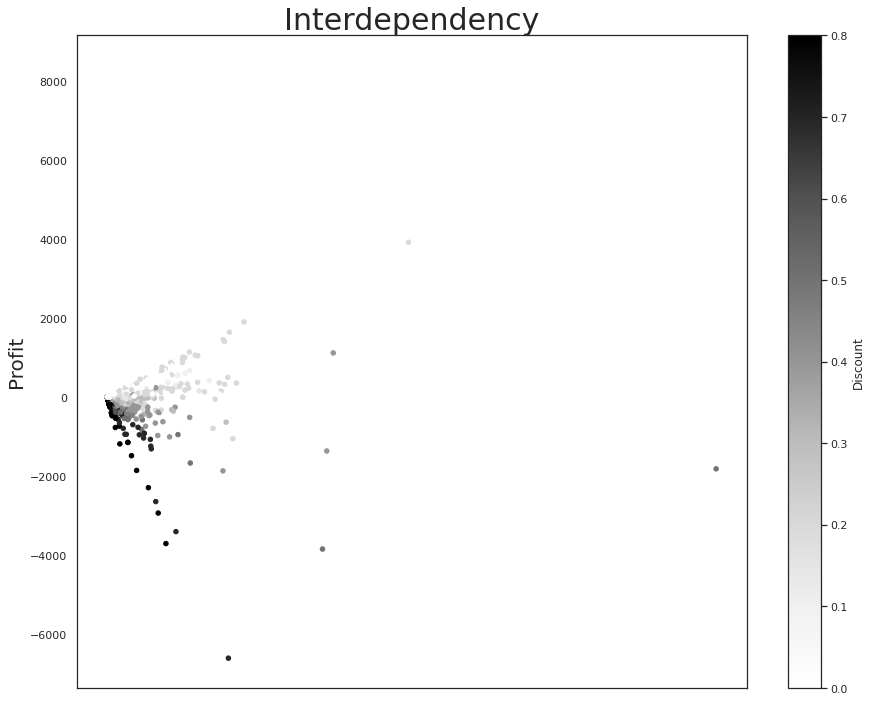

In [36]:
plt.figure(figsize=(12,8))
df.plot(x="Sales", y="Profit", kind="scatter",c="Discount",figsize=(15,12))
plt.title('Interdependency',fontsize=30)
plt.ylabel('Profit',fontsize=20)
plt.show()